In [2]:
import pandas as pd
fruits = pd.DataFrame({'numbers':[5,6,7,8,9],'categories':['watermelon','banana','orange','apple','grapes']})
display(fruits)

,numbers,categories
0,5,watermelon
1,6,banana
2,7,orange
3,8,apple
4,9,grapes


In [3]:
fruits_dum=pd.get_dummies(fruits)
display(fruits_dum)

,numbers,categories_apple,categories_banana,categories_grapes,categories_orange,categories_watermelon
0,5,0,0,0,0,1
1,6,0,1,0,0,0
2,7,0,0,0,1,0
3,8,1,0,0,0,0
4,9,0,0,1,0,0


In [5]:
fruits['numbers']=fruits['numbers'].astype(str)
pd.get_dummies(fruits,columns=['numbers'])

,categories,numbers_5,numbers_6,numbers_7,numbers_8,numbers_9
0,watermelon,1,0,0,0,0
1,banana,0,1,0,0,0
2,orange,0,0,1,0,0
3,apple,0,0,0,1,0
4,grapes,0,0,0,0,1


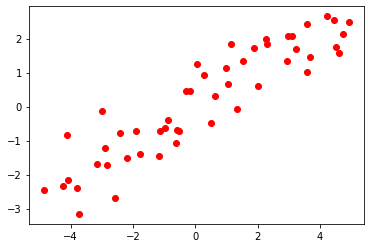

In [9]:
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random.RandomState(38)
x=rnd.uniform(-5,5,size=50)
y_no_noise = (np.cos(6*x)+x)
X=x.reshape(-1,1)
y=(y_no_noise+rnd.normal(size=len(x)))/2
plt.plot(X,y,'o',c='r')
plt.show()

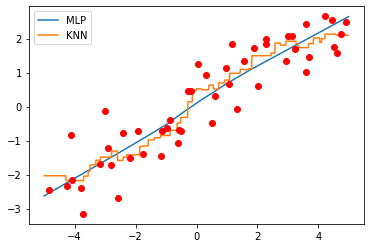

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
line=np.linspace(-5,5,1000,endpoint=False).reshape(-1,1)
mlpr = MLPRegressor().fit(X,y)
knr = KNeighborsRegressor().fit(X,y)
plt.plot(line,mlpr.predict(line),label='MLP')
plt.plot(line,knr.predict(line),label='KNN')
plt.plot(X,y,'o',c='r')
plt.legend(loc='best')
plt.show()

In [14]:
bins=np.linspace(-5,5,11)
target_bin=np.digitize(X,bins=bins)
print('bining data range:\n{}'.format(bins))
print('\nfirst 10 data point features:\n{}'.format(X[:10]))
print('\nfirst 10 data point bins:\n{}'.format(target_bin[:10]))

bining data range:
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]

first 10 data point features:
[[-1.1522688 ]
 [ 3.59707847]
 [ 4.44199636]
 [ 2.02824894]
 [ 1.33634097]
 [ 1.05961282]
 [-2.99873157]
 [-1.12612112]
 [-2.41016836]
 [-4.25392719]]

first 10 data point bins:
[[ 4]
 [ 9]
 [10]
 [ 8]
 [ 7]
 [ 7]
 [ 3]
 [ 4]
 [ 3]
 [ 1]]


In [15]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(sparse=False)
onehot.fit(target_bin)
X_in_bin=onehot.transform(target_bin)
print('data shape after bining:{}'.format(X_in_bin.shape))
print('\nfirst 10 data points after bining:\n{}'.format(X_in_bin[:10]))

data shape after bining:(50, 10)

first 10 data points after bining:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


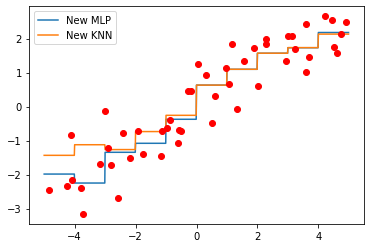

In [16]:
new_line=onehot.transform(np.digitize(line,bins=bins))
new_mlpr=MLPRegressor().fit(X_in_bin,y)
new_knr=KNeighborsRegressor().fit(X_in_bin,y)
plt.plot(line,new_mlpr.predict(new_line),label='New MLP')
plt.plot(line,new_knr.predict(new_line),label='New KNN')
plt.plot(X,y,'o',c='r')
plt.legend(loc='best')
plt.show()

In [17]:
array_1 = [1,2,3,4,5]
array_2 = [6,7,8,9,0]
array_3 = np.hstack((array_1,array_2))
print('add array2 to array1:{}'.format(array_3))

add array2 to array1:[1 2 3 4 5 6 7 8 9 0]


In [18]:
X_stack = np.hstack([X,X_in_bin])
print(X_stack.shape)

(50, 11)


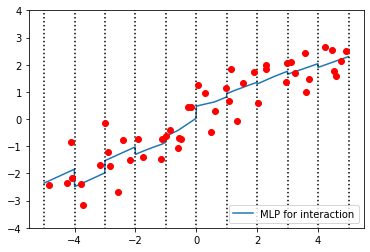

In [19]:
line_stack = np.hstack([line,new_line])
mlpr_interact=MLPRegressor().fit(X_stack,y)
plt.plot(line,mlpr_interact.predict(line_stack),label='MLP for interaction')
plt.ylim(-4,4)
for vline in bins:
    plt.plot([vline,vline],[-5,5],':',c='k')
plt.legend(loc='lower right')
plt.plot(X,y,'o',c='r')
plt.show()

In [21]:
X_multi=np.hstack([X_in_bin, X*X_in_bin])
print(X_multi.shape)
print(X_multi[0])

(50, 20)
[ 0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        -0.        -0.
 -0.        -1.1522688 -0.        -0.        -0.        -0.
 -0.        -0.       ]


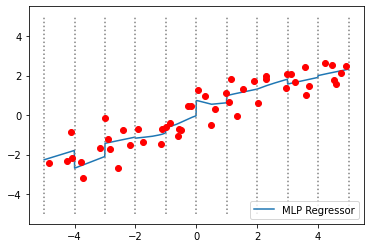

In [24]:
mlpr_multi=MLPRegressor().fit(X_multi,y)
line_multi=np.hstack([new_line,line*new_line])
plt.plot(line,mlpr_multi.predict(line_multi),label='MLP Regressor')
for vline in bins:
    plt.plot([vline,vline],[-5,5],':',c='gray')
plt.plot(X,y,'o',c='r')
plt.legend(loc='lower right')
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=20,include_bias=False)
X_poly=poly.fit_transform(X)
print(X_poly.shape)

(50, 20)


In [28]:
print('first sample feature in original data:{}'.format(X[0]))
print('\nfirst sample feature in data after engineering:{}'.format(X_poly[0]))

first sample feature in original data:[-1.1522688]

first sample feature in data after engineering:[ -1.1522688    1.3277234   -1.52989425   1.76284942  -2.0312764
   2.34057643  -2.6969732    3.10763809  -3.58083443   4.1260838
  -4.75435765   5.47829801  -6.3124719    7.27366446  -8.38121665
   9.65741449 -11.12793745  12.82237519 -14.77482293  17.02456756]


In [29]:
print('PolynomialFeatures data engineering:\n{}'.format(poly.get_feature_names()))

PolynomialFeatures data engineering:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15', 'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


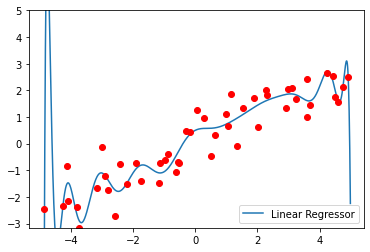

In [30]:
from sklearn.linear_model import LinearRegression
LNR_poly=LinearRegression().fit(X_poly,y)
line_poly=poly.transform(line)
plt.plot(line,LNR_poly.predict(line_poly),label='Linear Regressor')
plt.xlim(np.min(X)-0.5,np.max(X)+0.5)
plt.ylim(np.min(y)-0,5,np.max(y)+0.5)
plt.plot(X,y,'o',c='r')
plt.legend(loc='lower right')
plt.show()

In [31]:
import pandas as pd
stock=pd.read_csv('d:/stock dataset/071013.csv',encoding='GBK')
print('stock.head()')

FileNotFoundError: [Errno 2] No such file or directory: 'd:/stock dataset/071013.csv'

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
mlpr=MLPRegressor(random_state=62,hidden_layer_sizes=(100,100),alpha=0.001)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=62)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
mlpr.fit(X_train_scaled,y_train)
print('accuracy:{:.2f}'.format(mlpr.score(X_test_scaled,y_test)))

wanted=stock.loc[:,'name']
print(wanted[y>=10])

from sklearn.feature_selection import SelectPercentile
select=SelectPercentile(percentile=50)
select.fit(X_train_scaled,y_train)
X_train_selected=select.transform(X_train_scaled)
print('shape after scaling:{}'.format(X_train_scaled.shape))
print('shape after selection:{}'.format(X_train_selected.shape))

mask=select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel('Features Selected')
plt.show()


X_test_selected=select.transform(X_test_scaled)
mlpr_sp=MLPRegressor(random_state=62,hidden_layer_sizes=(100,100),alpha=0.001)
mlpr_sp.fit(X_train_selected,y_train)
print('accuracy after feature selection:{:.2f}'.format(mlpr_sp.score(X_test_selected,y_test)))

accuracy:0.73


NameError: name 'stock' is not defined

shape after selection from model random forest:(37, 1)
[ True]


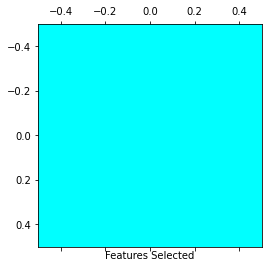

accuracy after sfm:0.73


In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
sfm=SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=38),threshold='median')
sfm.fit(X_train_scaled,y_train)
X_train_sfm=sfm.transform(X_train_scaled)
print('shape after selection from model random forest:{}'.format(X_train_sfm.shape))

mask_sfm=sfm.get_support()
print(mask_sfm)

plt.matshow(mask_sfm.reshape(-1,1),cmap=plt.cm.cool)
plt.xlabel('Features Selected')
plt.show()

X_test_sfm=sfm.transform(X_test_scaled)
mlpr_sfm=MLPRegressor(random_state=62,hidden_layer_sizes=(100,100),alpha=0.001)
mlpr_sfm.fit(X_train_sfm,y_train)
print('accuracy after sfm:{:.2f}'.format(mlpr_sfm.score(X_test_sfm,y_test)))

In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(RandomForestRefression(n_estimator=100,random_state=38),n_features_to_select=12)
rfe.fit(X_train_scaled,y_train)
mask=rfe.get_support()
print(mask)

plt.matshow(mask.reshape(-1,1),cmap=plt.cm.cool)
plt.xlabel('Features Selected')
plt.show()

X_train_rfe=rfe.transform(X_train_scaled)
X_test_rfe=rfe.transform(X_test_scaled)
mlpr_rfe=MLPRegressor(random_state=62,hidden_layer_sizes=(100,100),alpha=0.001)
mlpr_rfe.fit(X_train_rfe,y_train)
print('accuracy after rfe:{:.2f}'.format(mlpr_rfe.score(X_test_rfe,y_test)))